<a href="https://colab.research.google.com/github/dsPratik-cyber/Practisegit/blob/main/MNIST_Digit_Recognition_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libarary

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random

random.seed(25)
np.random.seed(25)
tf.random.set_seed(25)


Load data

In [57]:
train = pd.read_csv('/content/train.csv')

In [58]:
test = pd.read_csv('/content/test.csv')

Data Preparation

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [60]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [62]:
X_train = train.drop(labels = ['label'], axis = 1)

Y_train = train['label']

In [63]:
X_train.shape

(42000, 784)

In [64]:
Y_train.shape

(42000,)

Checking Null Values

In [65]:
X_train.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [66]:
test.isnull().sum()

,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
pixel4,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


Normalization

In [67]:
X_train = X_train / 255.0
test = test / 255.0

Reshape Data

In [68]:
X_train = X_train.values.reshape(-1,28,28,1)

test = test.values.reshape(-1,28,28,1)

One-hot Encoding

In [69]:
from tensorflow.keras.utils import to_categorical


Y_train = to_categorical(Y_train, 10)

In [70]:
random_seed = 2

train_test_split

In [71]:
from sklearn.model_selection import train_test_split


In [72]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state = random_seed)

Model Architecture

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [74]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


EarlyStopping , Learning rate

In [76]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [77]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2)


Model Training

In [78]:
history = model.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=20,
          batch_size=64,
          callbacks=[early_stopping, lr_scheduler])


Epoch 1/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 44s 71ms/step - accuracy: 0.7966 - loss: 0.6219 - val_accuracy: 0.9752 - val_loss: 0.0768 - learning_rate: 0.0010
Epoch 2/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.9666 - loss: 0.1139 - val_accuracy: 0.9843 - val_loss: 0.0494 - learning_rate: 0.0010
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.9759 - loss: 0.0775 - val_accuracy: 0.9855 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 4/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 36s 60ms/step - accuracy: 0.9803 - loss: 0.0628 - val_accuracy: 0.9900 - val_loss: 0.0373 - learning_rate: 0.0010
Epoch 5/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 38s 64ms/step - accuracy: 0.9824 - loss: 0.0531 - val_accuracy: 0.9871 - val_loss: 0.0412 - learning_rate: 0.0010
Epoch 6/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 37s 62ms/step - accuracy: 0.9854 - loss: 0.0453 - val_accuracy: 0.9886 - val_loss: 0.0358 - learning_rate: 0.0010
Epoch 7/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.9879 - l

Model Evaluation

In [79]:
test_loss, test_accuracy = model.evaluate(X_val, Y_val, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.21%


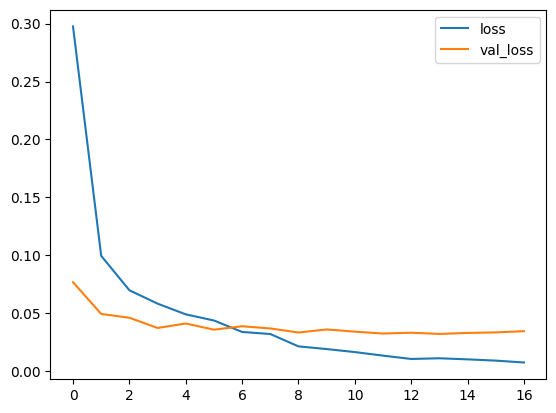

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

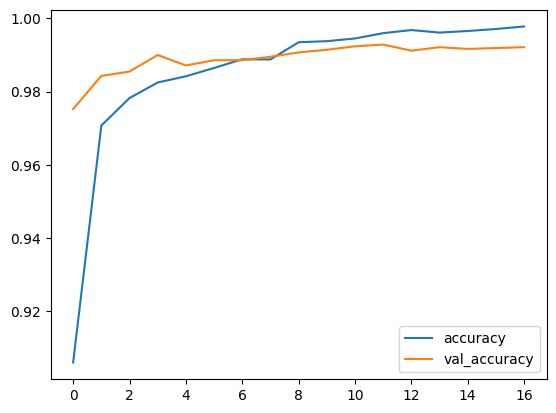

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


Data Augmentation

In [83]:
datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.05
)
datagen.fit(X_train)

Model Training with Data Augmentation

In [86]:
History = model.fit(datagen.flow(X_train, Y_train, batch_size=64),
          validation_data=(X_val, Y_val),
          epochs=20,
          callbacks=[early_stopping, lr_scheduler])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 61s 102ms/step - accuracy: 0.9700 - loss: 0.1026 - val_accuracy: 0.9921 - val_loss: 0.0290 - learning_rate: 3.1250e-05
Epoch 2/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 51s 86ms/step - accuracy: 0.9709 - loss: 0.0965 - val_accuracy: 0.9917 - val_loss: 0.0285 - learning_rate: 3.1250e-05
Epoch 3/20
591/591 ━━━━━━━━━━━━━━━━━━━━ 51s 87ms/step - accuracy: 0.9730 - loss: 0.0906 - val_accuracy: 0.9921 - val_loss: 0.0297 - learning_rate: 3.1250e-05


Model Evaluation

In [87]:
test_loss, test_accuracy = model.evaluate(X_val, Y_val, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 99.21%
